In [1]:
import os
import sys

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")

if src_path not in sys.path:
    sys.path.append(src_path)

from utils import table_kpss, table_adf
from plots import plot_acf_sample, plot_pacf_sample, plot_acf_theoretical, plot_pacf_theoretical

FIG_PATH = os.path.join(project_root, "results", "figures")

os.makedirs(FIG_PATH, exist_ok=True)

np.random.seed(4242)


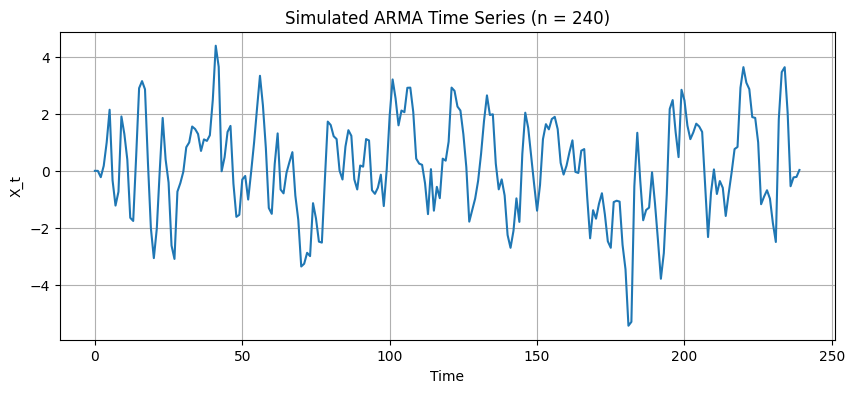

In [2]:
n = 240
phi = [0.6, -0.3]       
theta = [0.5, 0.25]    

X = np.zeros(n)
eps = np.random.normal(0, 1, n)

for t in range(2, n):
    X[t] = (phi[0] * X[t-1] +
            phi[1] * X[t-2] +
            eps[t] +
            theta[0] * eps[t-1] +
            theta[1] * eps[t-2])
    
plt.figure(figsize=(10,4))
plt.plot(X)
plt.title("Simulated ARMA Time Series (n = 240)")
plt.xlabel("Time")
plt.ylabel("X_t")
plt.grid(True)
plt.show()

In [3]:

df_adf  = table_adf(X, autolag="AIC")
df_kpss = table_kpss(X, regression='c', nlags='auto')

print("\n=== Augmented Dickey-Fuller Test (ADF) ===")
display(df_adf)

print("\n=== KPSS Test ===")
display(df_kpss)


=== Augmented Dickey-Fuller Test (ADF) ===


,Statistic,p-value,Lags used,N obs,Crit (1%),Crit (5%),Crit (10%)
0,-6.37835,2.254408e-08,2,237,-3.458247,-2.873814,-2.573311



=== KPSS Test ===


,Statistic,p-value,Lags used,Crit (10%),Crit (5%),Crit (2.5%),Crit (1%)
0,0.082657,0.1,7,0.347,0.463,0.574,0.739


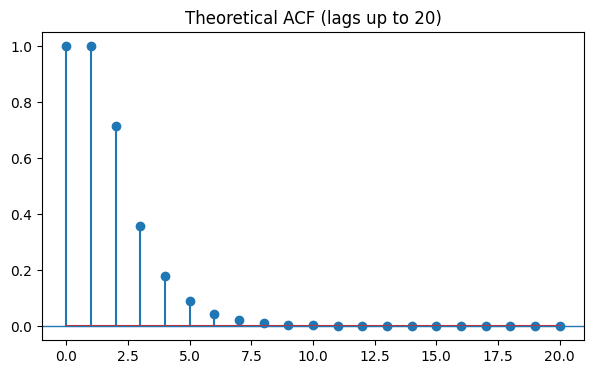

<Figure size 700x400 with 0 Axes>

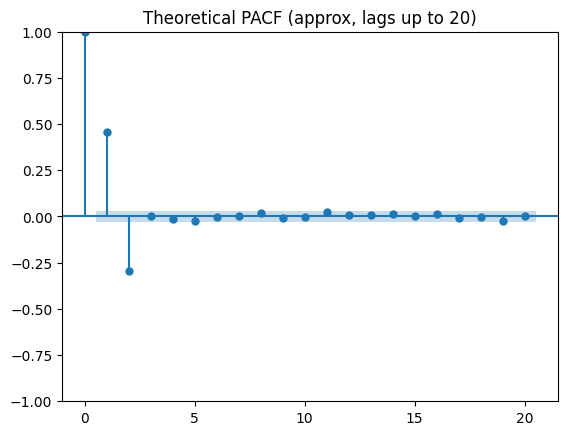

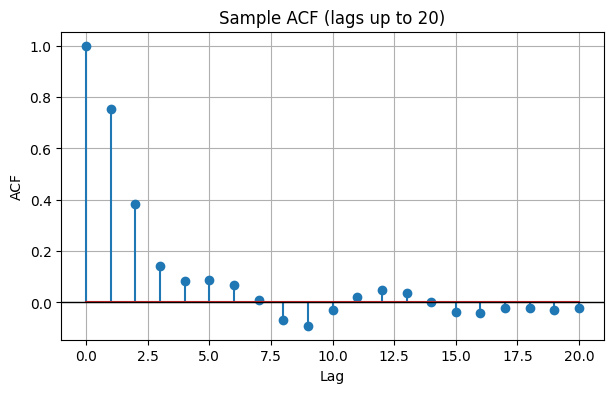

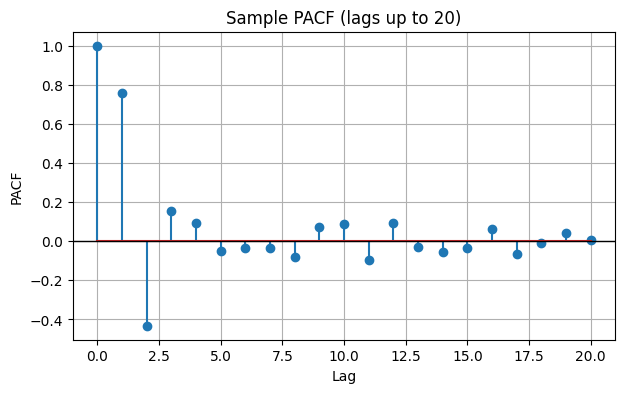

In [ ]:
plot_acf_theoretical(phi, theta, lags=20)
plot_pacf_theoretical(phi, lags=20)

plot_acf_sample(X, lags=20)
plot_pacf_sample(X, lags=20)